# 텐서플로우가 정확히 무엇이고 연구자와 엔지니어에게 인기가 많은 이유

```
- 차이점 위주 : 파이토치나 여러 딥러닝 라이브러리도 자동 미분, 오픈소스, GPU, 사전 훈련 모델이 다 있다 근데 왜 텐서플로가 좋냐
1. Keras와 상호작용한다
2. 오픈소스 커뮤니티의 장이다.
```

# 케라스란?

```
텐서플로 2.0의 표준 하이레벨 API로 코딩을 크게 단순화시키고 프로그래밍을 좀 더 직관적으로 만듬.

1. tf.keras를 써야한다
2. tf 2.0의 핵심 아이디어는 텐서플로를 좀 더 쉽게 배우고 적용할 수 있게 만드는 것이다. tf1.x를 보지 않고 2.0을 본 사람은 운이 좋은 것이다.
```

# 신경망

```
1. 신경망이 뜬게 빅데이터가 되면서 훈련에 쓰일 대규모 데이터의 수집이 가능하였기 때문이다.
```

# 퍼셉트론이란?
```
입력을 받아서 1 또는 0을 출력하는 간단한 알고리즘이다.

-> 문제점 : 출력에 큰 변화가 생기어 점진적인(연속) 학습을 할 수 없다. 이러한 큰 변화는 학습에 도움이 되지 않는다.

-> 불연속 없이 0에서 1로 점진적으로 변경되는 함수가 필요하다. 
```

In [ ]:
# 텐서플로우 2.0 코드

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

NB_Classes = 10
Reshaped = 784

model = Sequential()
model.add(Dense(NB_Classes, 
                input_shape = (Reshaped,), kernel_initializer = 'zeros', #각 뉴런을 특정 가중치로 초기화할 수 있다. 
                
                
                
                # 1. random_uniform : -0.05 ~ 0.05 사이에서 균등하게 랜덤 분포
                # 2. random_normal : 가우스 분포에따라 평균이 0이고 표편 0.05로 초기화
                # 3. zero : 다 0
                name = "dense_layer", activation = "softmax"))

In [ ]:
# 1. random_normal -> 평균이 대략인가 보네 -> randn이 -1~1에서 정규분포였다.
import numpy as np
print(np.random.normal(0, 0.05, 10))
print(np.mean(np.random.normal(0, 0.05, 10)))
print(np.std(np.random.normal(0, 0.05, 10)))

[-0.07868139  0.02677847  0.03659491  0.01426401  0.08123903  0.05910901
 -0.01404708  0.06457884 -0.01888713  0.05370253]
0.004991894828491165
0.05024707681808952


In [ ]:
# 2. random_uniform -> normal보다 평균이 0에서 멀다. -> rand가 균등 분포였다.
print(np.random.uniform(0, 0.05, 10))
print(np.mean(np.random.uniform(0, 0.05, 10)))

[0.04662301 0.04888243 0.01682566 0.00793349 0.02330614 0.01827709
 0.00195874 0.03401865 0.02618006 0.02608946]
0.0310063325706396


# 실제 예제 : 필기체 숫자 인식

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# network and training
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128 # 은닉층 개수?
VALIDATION_SPLIT=0.2

In [ ]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
RESHAPE = 784

X_train = X_train.reshape(60000, RESHAPE)
X_test = X_test.reshape(10000, RESHAPE)
 
X_train = X_train.astype('float32') # 32비트 정밀도를 갖도록 float32로 변환, 0 ~ 1사이로 정규화 -> 이렇게 하면 소수점 20자리가 4자리로 안정화된다
X_test = X_test.astype('float32')

In [ ]:
# normalize in [0, 1]
X_train /= 255
X_test /= 255


Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

In [ ]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
                             input_shape = (RESHAPE, ),
                             name = "dense_layer",
                             activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


```
결과 해석
- epoch 결과 점점 정확도가 올라간다.
- 훈련에서 60 82 쭉쭉 오름
- 검증에서 83 86 오름
- 최종은 테스트 셋으로 92 나옴
```

In [ ]:
# compiling the model
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#training the model
model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT) # 검증하고자 남겨두었다!! 60000개에서 80인 48000개로 훈련, 12000개로 검증

#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(X_test)

Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 1.4106 - accuracy: 0.6600 - val_loss: 0.9019 - val_accuracy: 0.8303
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.7950 - accuracy: 0.8296 - val_loss: 0.6581 - val_accuracy: 0.8627
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6433 - accuracy: 0.8501 - val_loss: 0.5616 - val_accuracy: 0.8731
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.8617 - val_loss: 0.5087 - val_accuracy: 0.8791
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.8685 - val_loss: 0.4747 - val_accuracy: 0.8842
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.8737 - val_loss: 0.4507 - val_accuracy: 0.8871
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.8780 - val_loss: 0.4323 - val_accuracy: 0.8897

# 신경망 베이스라인 구축 
- 위에 코드가 버전 1이고 이것을 개선해 나가는 것을 중점으로

```
버전 2 : 신경망 은닉층 추가

- 일정 에폭을 넘어서면 개선이 중지되거나 거의 감지할 수 없을 정도가 된다는 점에 주목하자 
-> 이러한 현상을 수렴이라고 부름 따라서 수렴하는 에폭에 에폭 상수를 맞추면 됨
```

In [ ]:
#build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='softmax'))

```
버전 3 : 드롭아웃
- 신경망의 일반화를 향상시키는데 도움이 되는 유용한 중복 패턴을 학습시킨다는 것
- 테스트 집합에 포함된 낯선 예시를 잘 일반화하는 것에 주목
- 각각의 뉴런이 자기 이웃에 의존할 수 없다는 것을 인식하기 떄문에 성능 향상
- 테스트하는 동안에는 드롭아웃이 없음
- ★ 훈련 정확도는 무조건 테스트 정확도 보다 높아야한다 그렇지 않으면 충분히 오랫동안 훈련을 받지 못한 것이다.
→ 아까 수렴했다고 생각해서 에폭을 줄였다면 다시 좀 늘리자

→ 근데 바로 늘리면 시간만 버리는 것일 수 있다. 에폭은 처음에 작게 했다가 최적화기 V1, V2, V3, V4를 해보고 가장 좋은 시점에서 엄청 크게 높이는 것이다.
```

In [ ]:
#build the model

DROPOUT = 0.3

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='softmax'))

```
버전 4 : 최적화
- RMSProp : SGD에서 속도 개념(모멘텀) 포함 -> 이는 좀 더 많은 계산을 통해 더 빠른 수렴이 가능
- 어느 방향으로 움직이기 시작했다가 방향을 바꾸기로 결심했지만,
이전의 선택을 기억하고 있는 등산객으로 기억의 방향으로 가속화하고 이것이 왔다 갔다 하는 것을 줄이는데 도움을 준다.

- 은닉층의 내부 뉴런 수를 늘리는 것과 배치 사이즈를 늘리는 것도 실험의 대상이다. 여기서는 변화가 없어서 뺐다.
```

### 텐서보드
를 사용하면 에폭당 오차, 정확도의 변화는 물론이거니와, 
<br> 드롭아웃 값, 최적화기, 학습률, 은닉층 뉴런 수, 배치 사이즈 등에 따른 정확도 비교 그래프를 볼 수 있디 WOW

# IMDB

- 확실히 신기하긴 하네 ㅋㅋㅋㅋㅋ 그냥 단어를 정수로 맵핑한 것일 뿐인데 그걸 임베딩으로 학습을 해서 긍정 부정을 분류하고 참 재밌다.

- 질문 : 생각해보면 그냥 똑같은 입력인 거 같기도 한데 왜 임베딩을 하는 걸까? 임베딩이 그냥 은닉층 대신에 있다고 볼 수 도 있는 거 아님??


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
import tensorflow_datasets as tfds
max_len = 200
n_words = 10000
dim_embedding = 256
EPOCHS = 20 
BATCH_SIZE =500


def load_data():#load data
  (X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words) # 10000개의 단어로만 이루어진 리뷰다.
  # Pad sequences with max_len
  
  # 이미지는 다 784행인데 리뷰는 문장에 단어 개수가 다 다르니 최대 길이를 200으로 잡고 넘으면 지워버리고 부족하면 0으로 padding한다.
  X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len) 
  X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
  return (X_train, y_train), (X_test, y_test)

In [ ]:
def build_model(): 
  model = models.Sequential()
  # 임베딩레이어 : 입력 데이터를 일정한 크기를 가진 이진 벡터(0, 1로 된 것)로 만든다 -> 인코딩처럼 sparse 하게가 아니고 꽉 채운 dense
  # 단어 하나 하나를 다 이진 벡터로 바꾼다 256 벡터로 맵핑 -> 각 단어를 어떤 벡터로 맵핑 시키는 게 좋은지 그것을 다 훈련할 때 배운다. -> 성격도 비슷하고 내용도 비슷한 애들을 모으도록 맵핑한다./ 
  # 여튼 정수를 맵핑한다/ 입력 차원보다 더 작은 차원으로 대응시킨다. > 2^256의 경우의 수의 이진 벡터로 맵핑한다.

  
  # 파라미터 1. 나한테 들어올 수 있는 단어의 종류 개수/ 2. 각 단어(정수)를 길이가 몇 인 이진 벡터로 바꿀 거냐/ 3. 붙어 있는 단어의 개수가 몇 개냐 200개의 단어를 합쳐서 문장을 만들겠다. 
  # -> 200개의 단어를 한번에 받을 거고 그것을 각각 다 256의 벡터로 바뀔 것이다 결론 모든 단어를 다 바꾸면 256 * 200이 된다.
  # 그리고 그 이진 벡터로 맵핑할 때 어떤 이진벡터로 맵핑할지를 파라미터로 학습한다.

  model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len)) 
  model.add(layers.Dropout(0.3))

  # 단어를 한 개로 통합할 건데 통합 방식을 max로 하자 -> 이거를 하면 256개로 바꾼 상태에서 가장 큰애를 뽑는다 256비트로 된 단어 하나가 딱 남는다 > 그놈에 따라서 긍정인지 부정인지 결정한다./
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(128, activation='relu')) # 단어 하나로 하기에는 좀 그러니 그래도 은닉 하나 주자
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1, activation='sigmoid'))  

  return model
  
(X_train, y_train), (X_test, y_test) = load_data()


model=build_model()
model.summary()
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"]) 

score = model.fit(X_train, y_train, epochs= EPOCHS, \
                  batch_size = BATCH_SIZE,
                  validation_data = (X_test, y_test)) 



17473536/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          2560000   
                                                                 
 dropout (Dropout)           (None, 200, 256)          0         
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)


print("\nTest score:", score[0])
print('Test accuracy:', score[1])

50/50 [==============================] - 4s 71ms/step - loss: 0.5031 - accuracy: 0.8489

Test score: 0.5031378269195557
Test accuracy: 0.8488799929618835


# tf 1. vs 2

- 텐서란? 기본적으로 n차원 배열로 텐서플로는 다양한 수학 연산을 텐서로 정의하고 수행

- 형식 : 스칼라, 벡터, 행렬도 다 텐서(저차원 텐서)이다.

- 자료형 : 3가지 형태가 있고 이것들이 또 다 저 형식이 가능하다 ex) 상수 자료형의 스칼라/ 변수 자료형의 행렬/ 상수 자료형의 행렬 등등/

-> 3가지 :  상수, 변수, 플레이스 홀더

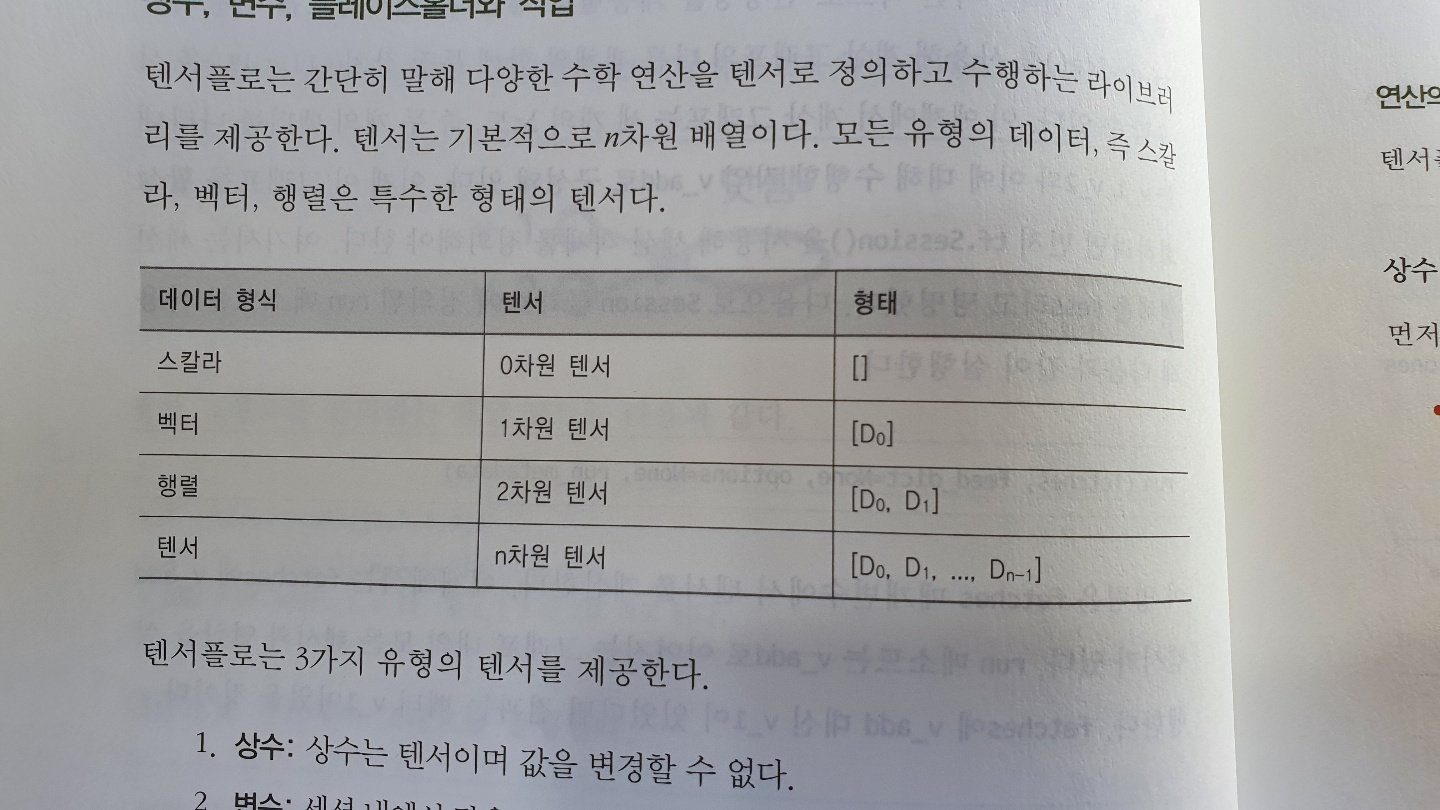

In [ ]:
import tensorflow as tf

In [ ]:
# tf 1
v_1 = tf.constant([1,2,3,4])
v_2 = tf.constant([2,1,5,3])

1. 노드 = 벡터를 tf.constant로 정의
2. 이 노드를 연결하면 계산 그래픠이다 = v_add
3. 이 그래프를 활성화하려면 Session 객체를 정의하고 run 메소드 -> 텐서가 흐른다.


In [ ]:
v_add = tf.add(v_1, v_2)

with tf.Session() as sess: 
  print(sess.run(v_add))

AttributeError: ignored

- 3가지 자료형
1. 상수 : 값을 변경할 수 없는 텐서
2. 변수 : 가중치 갱신해야 할 떄 사용
3. 플레이스 홀더 : 그래프를 실행하는 동안 할당하는 등 데이터를 공급하는데 사용

In [ ]:
# 시퀀스 : start부터 end까지 균등하기 분포한 전체 num개의 시퀀스를 생성
# tf.linspace(start, stop, num)

tf.linspace(2.0, 5.0, 5) # 균등하게 분포하네

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([2.  , 2.75, 3.5 , 4.25, 5.  ], dtype=float32)>

In [ ]:
tf.range() #와 비슷한 거고 이런 것을 시퀀스라고 부르는 구나

### 랜덤 텐서

In [ ]:
# 랜덤 텐서
tf.random.normal([2,3], mean=0, stddev=1, seed=12) # 평균이 0, 표준편차가 1, 형태가 2, 3인 정규 분포를 따르는 랜덤 값을 생성

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.43663138,  0.8449775 , -0.01180986],
       [-0.8844008 , -0.18527539,  0.21195167]], dtype=float32)>

In [ ]:
# 텐서를 첫번째 차원 축을 따라 섞는다
tf.random_shuffle(t_random) # t_random이 텐서다.

### 변수

In [ ]:
# 변수는 진짜 언어처럼 초기화를 꼭 해줘야한다.
rand_t = tf.random.uniform([50, 50], 0, 10, seed = 0)

t_a = tf.Variable(rand_t)
t_b = tf.Variable(rand_t)

In [ ]:
# w, b를 초기화
w = tf.Variable(tf.random.normal([100, 100], stddev=2))
b = tf.Variable(tf.zeros[100], name = 'biases')

TypeError: ignored

In [ ]:
# 변수를 변수로 초기화할 수 도 있다.
w2 = tf.Variable(w.initialized_value(), name = "w2")

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


In [ ]:
# 변수 저장
tf.train.Saver()

### 텐서보드

In [ ]:
import datetime

In [ ]:
log_dir = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
%load_ext tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir = ./keras

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

## tf 2

### 오토그래프

In [ ]:
# 오토그래프 : tf2는 tf1과 다르게 파이썬 코드를 자동으로 계산 그래프로 만들어준다
# -> 방법 tf.function 어노테이션 사용

import tensorflow as tf

def linear_layer(x):
  return 3*x+2

@tf.function
def simple_nn(x):
  # 하나의 함수에만 어노테이션을 달면 거기에서 호출된 다른 모든 함수는 자동으로 계산 그래프로 변환된다.
  # 즉 linear_layer는 어노테이션 안달아도 계산 그래프로 변환됨
  return tf.nn.relu(linear_layer(x)) 

def simple_function(x):
  return x*3

In [ ]:
import tensorflow as tf
import timeit

cell = tf.keras.layers.LSTMCell(100)

@tf.function
def fn(input, state):
    return cell(input, state)

input = tf.zeros([100, 100])
state = [tf.zeros([100, 100])] * 2
# warmup
cell(input, state)
fn(input, state)

graph_time = timeit.timeit(lambda: cell(input, state), number=100) #그냥 파이썬 코드로 만든 cell
auto_graph_time = timeit.timeit(lambda: fn(input, state), number=100) # fn함수로 만든 오토그래프 cell
print('graph_time:', graph_time)
print('auto_graph_time:', auto_graph_time)

# 오토그래프로 만든 cell이 10배 가까이 더 빠름

graph_time: 0.14792828500003452
auto_graph_time: 0.11374130400008653


### keras 모델 작성 API 3개 -> 세가지를 섞어 쓸 수 있다.

+ 유용한 경우가 다 다르다.

In [ ]:
# 1. 순차적
# 2. 함수적 : 다중입력, 다중 출력, 비순차 흐름과의 잔존 연결, 공유, 재사용 등 더 복잡한 모델 구축하려는 경우에 유용

# ex) 두개의 개별입력/ 두개의 개별 로지스틱 출력/ 하나의 공유 모듈

def build_model(): # Sequential처럼 함수로 안 만들어도 되긴 함
  text_input_a = tf.keras.Input(shape=(None, ), dtype = 'int32') # 두개의 개별 입력
  text_input_b = tf.keras.Input(shape=(None, ), dtype = 'int32')

  shared_embedding = tf.keras.layers.Embedding(1000, 128) # 하나의 공유 모듈

  encoded_input_a = shared_embedding(text_input_a) # 두 개의 개별 입력이 하나의 공유 모듈을 공유
  encoded_input_b = shared_embedding(text_input_b)

  # 두개의 개별 출력
  prediction_a = tf.keras.layers.Dense(1, activation='sigmoid', name='prediction_a')(encoded_input_a)
  prediction_b = tf.keras.layers.Dense(1, activation='sigmoid', name='prediction_b')(encoded_input_b)
 
  model = tf.keras.Model(inputs=[text_input_a, text_input_b], 
                         outputs = [prediction_a, prediction_b]) # 개별 입력을 리스트로, 개별 출력을 리스트로

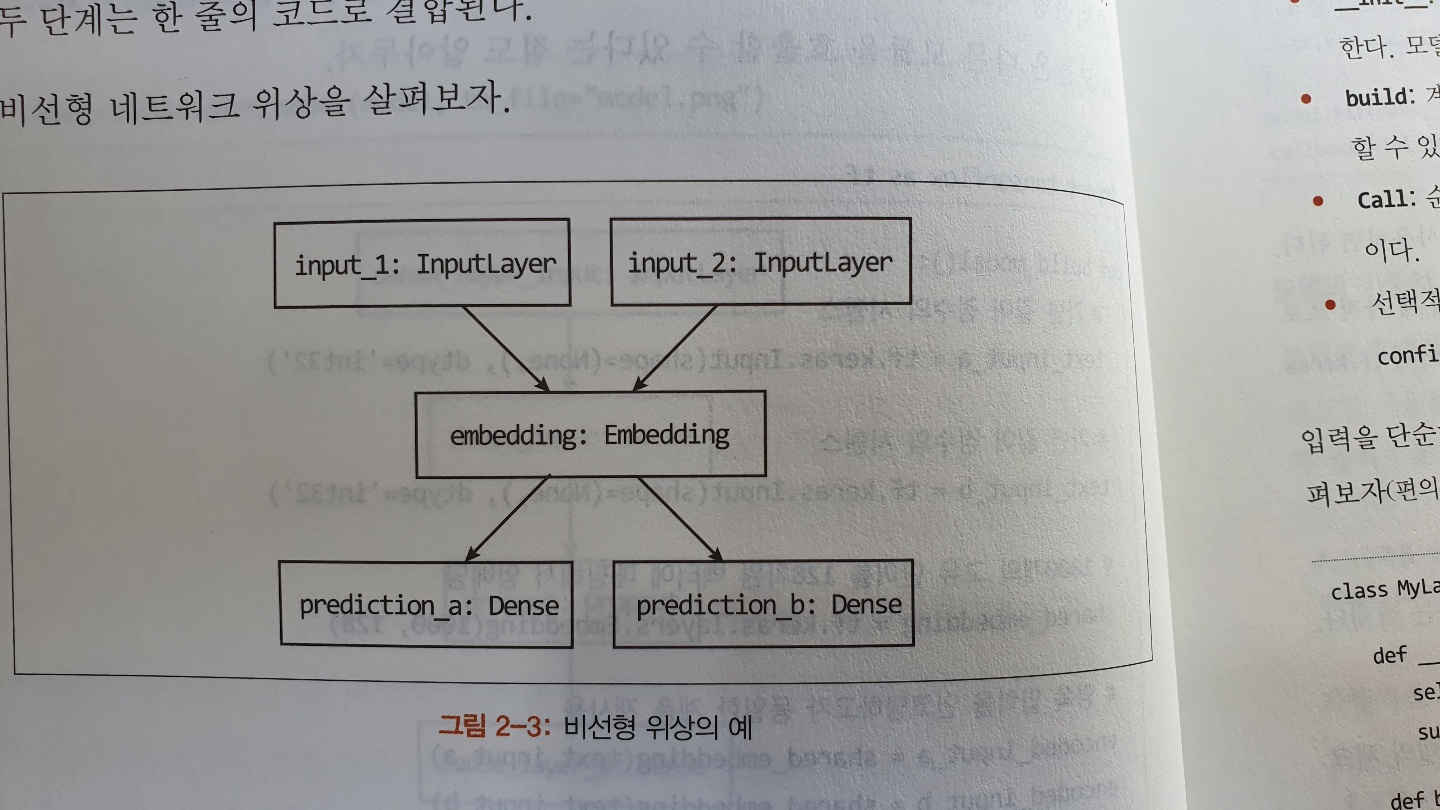

In [ ]:
# 3. 모델 서브클래싱 : 잘 알려진 레고가 아닌 자신만의 특수 레고 블럭을 만들 떄 유용, tf.keras.layers.Layer를 서브 클래싱하고 내 layer를 구현

class MyLayer(tf.keras.layers.Layer):

  def __init__(self, output_dim, **kwargs): # 이 계층에서 사용할 모든 하위 계층을 정의, 모델을 선언
    print(1)
    self.output_dim = output_dim
    super(MyLayer, self).__init__(**kwargs)

  def build(self, input_shape): # 계층의 가중치를 생성
    print(2)
    self.kernel = self.add_weight(name = "kernel", ## 부모 클래스 메소드겠지?
                                  shape = (input_shape[1], self.output_dim),
                                  initializer = "uniform",
                                  trainable = True)
    
  def call(self, inputs): # 순방향 전달 -> 계층이 호출되고 함수 형식으로 체인되는 곳
    print(3)
    return tf.matmul(inputs, self.kernel) # 꼭 init__ 에서 self 안해도 되네??


MyLayer(20) # 선언시 __init만 된다

1


In [ ]:
l1 = MyLayer(20)
l1.build([20, 30])

1
2


# 콜백

- 훈련중에 동작을 확장하거나 수정하고자 모델로 전달하는 그 무언가

1. modelcheckpoint : 정기적으로 모델의 체크 포인트를 저장하고 문제가 발생할 때 복구하는데 사용

2. learningrageschedular : 최적화하는 동안 학습률을 동적으로 변경

3. earlystopping : 검증 성능이 한 동안 개선되지 않은 경우 훈련을 중단

4. tensorboard : 텐서 보드를 사용해 모델의 행동을 모니터링

In [ ]:
# ③earlystopping 예제

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


# network and training
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128 # 은닉층 개수?
VALIDATION_SPLIT=0.2

mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPE)
X_test = X_test.reshape(10000, RESHAPE)
 
X_train = X_train.astype('float32') # 32비트 정밀도를 갖도록 float32로 변환, 0 ~ 1사이로 정규화 -> 이렇게 하면 소수점 20자리가 4자리로 안정화된다
X_test = X_test.astype('float32')

# normalize in [0, 1]
X_train /= 255
X_test /= 255


Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)


#build the model

DROPOUT = 0.3

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='softmax'))

model.summary()

# compiling the model
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모니터링할 지표와 몇 번의 에포크를 기다리고 조기 종률할지를 각각 monitor와 patience를 통해 지정
# val_loss가 최소값을 찍고 5번의 에폭동안 더 개선되지 않는다면 조기 종료한다. -> 179부터 개선되지 않아서 184에서 끝남
early_stopping = EarlyStopping(monitor="val_loss", patience=5) 

#training the model
model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping]) # 검증하고자 남겨두었다!! 60000개에서 80인 48000개로 훈련, 12000개로 검증

#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(X_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
375/375 [===========================

### # ① modelcheckpoint 예제

- 모든 에포크마다 모델을 저장하는 것은 비효율적이니 검증 세트 손실이 기존의 최고 성능 모델에 비해 낮아질 때만 저장되도록 하자

- 파라미터 : 
1. monitor로 val_loss를 하여 모델의 개선 여부 판단
2. save_best_only로 모델이 이전에 비해 개선되었을때만 저장

In [ ]:
# ① modelcheckpoint 예제


import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# network and training
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128 # 은닉층 개수?
VALIDATION_SPLIT=0.2

mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPE)
X_test = X_test.reshape(10000, RESHAPE)
 
X_train = X_train.astype('float32') # 32비트 정밀도를 갖도록 float32로 변환, 0 ~ 1사이로 정규화 -> 이렇게 하면 소수점 20자리가 4자리로 안정화된다
X_test = X_test.astype('float32')

# normalize in [0, 1]
X_train /= 255
X_test /= 255


Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)


#build the model

DROPOUT = 0.3

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='softmax'))

model.summary()

# compiling the model
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor="val_loss", patience=5) 
model_checkpoint = ModelCheckpoint(filepath="./{epoch}-{val_loss:.2f}-{val_accuracy:.2f}.h5", monitor="val_loss", save_best_only=True, verbose=1)

#training the model
model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping, model_checkpoint]) # 검증하고자 남겨두었다!! 60000개에서 80인 48000개로 훈련, 12000개로 검증

#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(X_test)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
374/375 [===========================

④ tensorboard 예제

- 기능
1. 훈련하는 동안 측정 지표를 시각적으로 모니터링
2. 모델 구조를 시각화
3. 활성화 출력과 그레디언트의 히스토그램을 그림
4. 3D 임베딩을 표현

In [ ]:
# 코드 7-7. 텐서보드를 사용한 텍스트 분류 모델

import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential


# 특성으로 사용할 단어의 수
max_features = 2000
# 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용합니다.)
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
                           input_length=max_len,
                           name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

17473536/17464789 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 500, 128)          256000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                       

In [ ]:
# 텐서보드 로그 파일을 위한 디렉터리 생성하기 -> 텐서보드 콜백은 지정된 디스크 위치에 로
# 로그 이벤트를 기록할 것이다.

import os
os.mkdir('my_log_dir')

In [ ]:
# 코드 7-9 텐서보드 콜백과 함께 모델 훈련하기
callbacks = [
  keras.callbacks.TensorBoard(
    # 로그 파일이 기록될 위치입니다.
    log_dir='my_log_dir',
    # 1 에포크마다 활성화 출력의 히스토그램을 기록합니다.
    histogram_freq=1,
    # 1 에포크마다 임베딩 데이터를 기록합니다.
    embeddings_freq=1,
  )
]
history = model.fit(x_train, y_train, epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20
157/157 [==============================] - 91s 569ms/step - loss: 0.5925 - acc: 0.6880 - val_loss: 0.4338 - val_acc: 0.8282
Epoch 2/20
157/157 [==============================] - 74s 470ms/step - loss: 0.4174 - acc: 0.8554 - val_loss: 0.4810 - val_acc: 0.8428
Epoch 3/20
157/157 [==============================] - 73s 464ms/step - loss: 0.3864 - acc: 0.8773 - val_loss: 0.5895 - val_acc: 0.8524
Epoch 4/20
157/157 [==============================] - 74s 472ms/step - loss: 0.3665 - acc: 0.8938 - val_loss: 0.6985 - val_acc: 0.8234
Epoch 5/20
157/157 [==============================] - 75s 481ms/step - loss: 0.3017 - acc: 0.9171 - val_loss: 0.5711 - val_acc: 0.8652
Epoch 6/20
157/157 [==============================] - 73s 463ms/step - loss: 0.2673 - acc: 0.9334 - val_loss: 0.6368 - val_acc: 0.8654
Epoch 7/20
157/157 [==============================] - 73s 468ms/step - loss: 0.2259 - acc: 0.9495 - val_loss: 0.7298 - val_acc: 0.8668
Epoch 8/20
157/157 [==============================] - 7

In [ ]:
# 이제 명령행에서 콜백이 사용한느 로그 디렉터리를 지정하여 텐서보드 서버 실행
# http://localhost:6006 로 모델의 훈련 결과를 확인 가능
# https://greatjoy.tistory.com/55 참고

!tensorboard --logdir=my_log_dir

2022-09-23 11:21:46.368589: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


# 모델과 가중치 저장

In [ ]:
file_path = "my_model"

# os.mkdir(file_path)
model.save_weights(file_path) # 가중치 저장

In [ ]:
model.load_weights(file_path) # 모델 상태 복원

In [ ]:
# 가중치 말고 모델은 3가지 형태로 저장 가능
# 1. json -> 모델 구조만 저장하고 불러오기

json_string = model.to_json()
model = tf.keras.models.model_from_json(json_string)

In [ ]:
# 2. yaml

yaml_string = model.to_yaml()
model = tf.keras.models.model_from_yaml(yaml_string)

RuntimeError: ignored

In [ ]:
# 3. h5 -> 모델 가중치와 최적화 매개변수와 함께 저장하고 싶다면

model.save("my_model.h5")
model = tf.keras.models.load_model("my_model.h5")

# tfds 설명

- 테디노트 - 텐서플로우 전문가 과정
https://www.youtube.com/watch?v=JSer0RyIPL8&list=PLIMb_GuNnFwegrf_XgIogbsyjQJ1B9M7p&index=2

- https://teddylee777.github.io/posts/page17/

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# See all registered datasets
builders = tfds.list_builders()
print (builders)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'criteo', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_ad

In [ ]:
# Load a given dataset by name, along with the DatasetInfo
data, info = tfds.load("cifar10", with_info=True)
train_data, test_data = data['train'], data['test']

print(info) # 가져온 데이터 메타 정보

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteLGCLGD/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteLGCLGD/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='~/tensorflow_datasets/cifar10/3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,

In [ ]:
train_data

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
# 다른 거로 해보자 -> 너무 오래걸려서 중단ㅋㅋㅋㅋ
data, info = tfds.load("coco", with_info=True)
train_data, test_data = data['train'], data['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: ignored

In [ ]:
train_dataset

NameError: ignored

### cifar로 다시

In [ ]:
train_data

<PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
for data in train_data.take(5): # 5개만 가지고 오겠다 -> ★ 이렇게 for문으로 해야만 데이터를 볼 수 있다.
  print(data)

{'id': <tf.Tensor: shape=(), dtype=string, numpy=b'train_16399'>, 'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [18

In [ ]:
for data in train_data.take(5): # 5개만 가지고 오겠다 -> ★ 이렇게 for문으로 해야만 데이터를 볼 수 있다.
  print(data["image"].shape)
  print(data["label"]) # 원-핫 안된 상태로 들어감

(32, 32, 3)
tf.Tensor(7, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(8, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(4, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(4, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(6, shape=(), dtype=int64)


In [ ]:
for data in train_data:
  image = tf.cast(data["image"], tf.float32) / 255.0 #데이터 정규화, cast 진행 -> 이게 이미지 기본 전처리 그거다
  label = data["label"]

In [ ]:
# 이걸 함수를 만듬
def preprocessing(data):
  image = tf.cast(data["image"], tf.float32) / 255.0
  label = data["label"]
  return image, label

In [ ]:
# 여기까지하면 데이터 로드가 끝난 거임!!
BATCH_SIZE = 128
train_data = train_data.map(preprocessing).shuffle(1000).batch(BATCH_SIZE)
test_data = test_data.map(preprocessing).batch(BATCH_SIZE)

## 학습까지 시켜보자

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
# 3. 합성곱 신경망 구성하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)               

In [ ]:
# 5. 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 원핫 아니면 sparse/ 원핫이면 그냥 카테고리컬
              metrics=['accuracy'])

In [ ]:
# 6. 훈련하기

# 이때 fit에 test_data만 쓰면 y argument라는 에러가 뜬다 -> 아마도 테셋에 y가 있으면 안된다는 소리 같다.
model.fit(train_data, validation_data = (test_data), epochs=5) 

Epoch 1/5
391/391 [==============================] - 84s 209ms/step - loss: 1.6819 - accuracy: 0.3881 - val_loss: 1.3978 - val_accuracy: 0.4954
Epoch 2/5
391/391 [==============================] - 61s 156ms/step - loss: 1.3134 - accuracy: 0.5322 - val_loss: 1.2379 - val_accuracy: 0.5579
Epoch 3/5
391/391 [==============================] - 61s 156ms/step - loss: 1.1904 - accuracy: 0.5810 - val_loss: 1.1477 - val_accuracy: 0.5979
Epoch 4/5
391/391 [==============================] - 61s 155ms/step - loss: 1.1026 - accuracy: 0.6155 - val_loss: 1.0749 - val_accuracy: 0.6236
Epoch 5/5
391/391 [==============================] - 61s 155ms/step - loss: 1.0400 - accuracy: 0.6382 - val_loss: 1.0806 - val_accuracy: 0.6262


```
넘파이 배열로 데이터셋을 작성하면 유용하다.

-> f.data는 데이터 입력 파이프 라인 빌드를 위한 텐서플로우의 서브패키지, 혹은 다른 말로 API이다.

로컬 파일이나 메모리에 올려져 있는 데이터를 모델에 집어넣기 적합한 텐서로 변환하는 작업을 한다. 

∴ 밑의 메소드는 모델에 데이터를 넣기위해 제공하는 메소드들인 것이다.
```

In [5]:
import tensorflow as tf
import numpy as np

num_items = 10
num_list = np.arange(num_items)

# -> 주어진 데이터소스를 여러 Tensor로 짜른다.
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [6]:
for i in num_list_dataset:
  print(i)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


```
데이터 셋을 섞거나 배치시키거나 생성자에서 분할할 수 있다.


1. 생성
- 1) from_tensor_slices() : 개별, 넘파이를 받고 배치를 지원
- 2) from_tensors() : 1과 같지만 배치 지원 X
- 3) from_generator() : 생성자 함수에서 입력을 취한다.


2. 변환

-1) batch() : 순차적으로 데이텃세을 지정한 크기로 분할
-2) repeat() : 데이터 복제
-3) shuffle() : 데이터를 무작위로 섞는다.
-4) map() : 데이터에 함수를 적용한다
-5) filter() : 데이터를 거르고자 함수를 적용한다.
```

In [7]:
import tensorflow_datasets as tfds

data, info = tfds.load("cifar10", with_info=True)
train_data = data['train']
train_data = train_data.batch(5).shuffle(50).take(2) # 이렇게 하면 즉시 사용할 수 있는 편리한 튜플로 변환됨

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incomplete0GLJEZ/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incomplete0GLJEZ/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


NameError: ignored

In [8]:
for data in train_data:
  print(data)

{'id': <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'train_40010', b'train_33661', b'train_42453', b'train_17423',
       b'train_47915'], dtype=object)>, 'image': <tf.Tensor: shape=(5, 32, 32, 3), dtype=uint8, numpy=
array([[[[ 68,  63,  35],
         [ 80,  81,  44],
         [ 91,  87,  47],
         ...,
         [ 77,  69,  32],
         [ 71,  59,  31],
         [ 72,  58,  34]],

        [[ 78,  71,  46],
         [ 90,  90,  66],
         [107, 102,  85],
         ...,
         [ 80,  67,  42],
         [ 72,  62,  37],
         [ 69,  60,  34]],

        [[ 89,  76,  53],
         [109, 106,  96],
         [134, 122, 124],
         ...,
         [ 81,  68,  35],
         [ 69,  63,  36],
         [ 66,  62,  36]],

        ...,

        [[138, 157, 191],
         [155, 168, 197],
         [148, 170, 210],
         ...,
         [125, 153, 205],
         [127, 150, 199],
         [135, 147, 183]],

        [[136, 160, 207],
         [144, 165, 208],
         [141, 166, 